<h2 id="exercises">Exercises</h2>
<p>The end result of this exercise should be a Jupyter notebook named <code>model</code>.</p>
<p>Using <a href="https://ds.codeup.com/saas.csv">saas.csv</a> or log data from API usage or store_item_sales</p>
<ol>


In [165]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

import env

In [166]:
df = pd.read_csv('saas.csv')

In [167]:
df.sample(100)

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
393099,2015-10-31,1015923,5393099,0.0,0.0
717705,2017-07-31,1025613,5717705,4.0,20.0
296320,2015-04-30,1021250,5296320,0.0,0.0
312837,2015-05-31,1020583,5312837,0.0,0.0
530402,2016-07-31,1006392,5530402,1.0,5.0
...,...,...,...,...,...
257210,2015-02-28,1015455,5257210,0.0,0.0
237214,2015-01-31,1012370,5237214,0.0,0.0
286262,2015-04-30,1007728,5286262,1.0,5.0
710188,2017-07-31,1010195,5710188,0.0,0.0


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Month_Invoiced     790458 non-null  object 
 1   Customer_Id        790458 non-null  int64  
 2   Invoice_Id         790458 non-null  int64  
 3   Subscription_Type  790458 non-null  float64
 4   Amount             790458 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 30.2+ MB


In [169]:
df.dtypes

Month_Invoiced        object
Customer_Id            int64
Invoice_Id             int64
Subscription_Type    float64
Amount               float64
dtype: object

In [170]:
# Convert to datetime, reindex, and sort
df.Month_Invoiced = pd.to_datetime(df.Month_Invoiced)
df = df.set_index("Month_Invoiced").sort_index()


In [171]:
df.index.value_counts()

2014-01-31    20000
2014-02-28    19800
2014-03-31    19599
2014-04-30    19413
2014-05-31    19221
2014-06-30    19038
2014-07-31    18851
2014-08-31    18672
2014-09-30    18494
2014-10-31    18313
2014-11-30    18145
2014-12-31    17996
2015-01-31    17829
2015-02-28    17680
2015-03-31    17530
2015-04-30    17376
2015-05-31    17225
2015-06-30    17089
2015-07-31    16951
2015-08-31    16817
2015-09-30    16671
2015-10-31    16529
2015-11-30    16387
2015-12-31    16268
2016-01-31    16142
2016-02-29    16019
2016-03-31    15895
2016-04-30    15777
2016-05-31    15685
2016-06-30    15571
2016-07-31    15460
2016-08-31    15355
2016-09-30    15240
2016-10-31    15144
2016-11-30    15049
2016-12-31    14938
2017-01-31    14840
2017-02-28    14741
2017-03-31    14665
2017-04-30    14576
2017-05-31    14475
2017-06-30    14400
2017-07-31    14312
2017-08-31    14209
2017-09-30    14131
2017-10-31    14041
2017-11-30    13985
2017-12-31    13914
Name: Month_Invoiced, dtype: int64

In [172]:
df.head()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0


In [173]:
df.value_counts()

Customer_Id  Invoice_Id  Subscription_Type  Amount
1000000      5000000     0.0                0.0       1
1017036      5223141     0.0                0.0       1
1017034      5641023     0.0                0.0       1
             5655619     0.0                0.0       1
             5670129     0.0                0.0       1
                                                     ..
1008547      5765916     1.0                5.0       1
             5779839     1.0                5.0       1
1008548      5008548     0.0                0.0       1
             5028377     0.0                0.0       1
1029399      5790457     0.0                0.0       1
Length: 790458, dtype: int64

In [174]:
print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

Date Range: 2014-01-31 00:00:00 to 2017-12-31 00:00:00
Shape: (790458, 4)


In [175]:
df.isnull().sum()

Customer_Id          0
Invoice_Id           0
Subscription_Type    0
Amount               0
dtype: int64

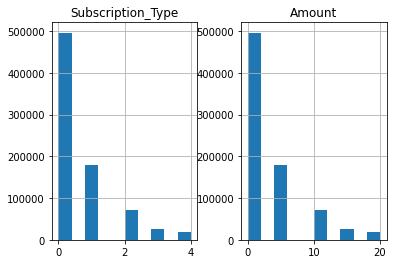

In [176]:
df[['Subscription_Type', 'Amount']].hist();

In [177]:
df.Subscription_Type.value_counts()

0.0    496410
1.0    178212
2.0     70706
3.0     26474
4.0     18656
Name: Subscription_Type, dtype: int64

In [178]:
df.Amount.value_counts()

0.0     496410
5.0     178212
10.0     70706
15.0     26474
20.0     18656
Name: Amount, dtype: int64

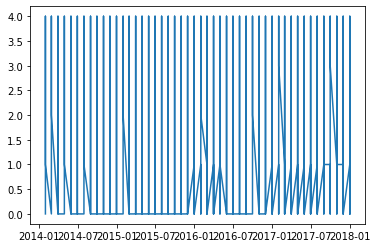

In [179]:
plt.plot(df.index, df.Subscription_Type)

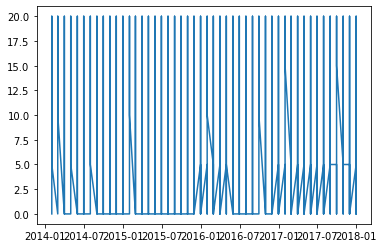

In [180]:
plt.plot(df.index, df.Amount)

What is useful to model here. Monthly revenue?

In [181]:
month = df.resample('M').sum()

In [182]:
month.head()

,Customer_Id,Invoice_Id,Subscription_Type,Amount
Month_Invoiced,,,,
2014-01-31,20199990000,100199990000,7170.0,35850.0
2014-02-28,20000052061,99592010100,7438.0,37190.0
2014-03-31,19799172212,98967090801,7659.0,38295.0
2014-04-30,19613251862,98406535365,7851.0,39255.0
2014-05-31,19421255289,97804559262,8071.0,40355.0


In [183]:
month.drop(['Customer_Id', 'Invoice_Id', 'Subscription_Type'], axis=1, inplace=True)

In [184]:
month.head()

,Amount
Month_Invoiced,
2014-01-31,35850.0
2014-02-28,37190.0
2014-03-31,38295.0
2014-04-30,39255.0
2014-05-31,40355.0


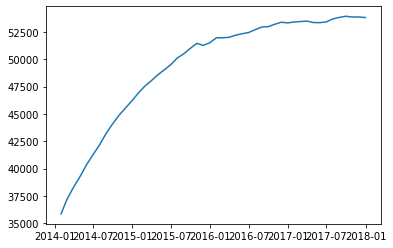

In [185]:
plt.plot(month.index, month.Amount)

Looks like we have two phases of growth:
    - an initial, exponential phase
    - steady, state growth phase

Model only learns know/world it is trained on. So, ignore exponential growth years, train only on early phases of organic grownth and validate/test/on final parts of that

split into exponential and steady state

In [186]:
exp_growth = month[:'2015-12-31']
steady_growth = month['2016-01-01':]

In [187]:
exp_growth.tail()

,Amount
Month_Invoiced,
2015-08-31,50495.0
2015-09-30,50985.0
2015-10-31,51445.0
2015-11-30,51260.0
2015-12-31,51505.0


In [188]:
steady_growth.head()

,Amount
Month_Invoiced,
2016-01-31,51955.0
2016-02-29,51955.0
2016-03-31,52000.0
2016-04-30,52190.0
2016-05-31,52325.0


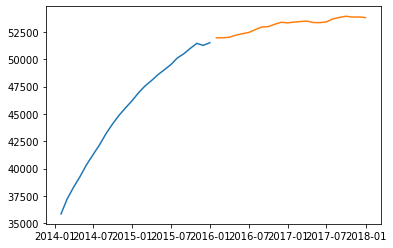

In [189]:
plt.plot(exp_growth)
plt.plot(steady_growth)

1. Split data (train/validate/test) and resample by any period, except daily, and aggregate using the sum. </li>


In [190]:
train_size = int(len(steady_growth) * .5)
validate_size = int(len(steady_growth) * .3)
test_size = int(len(steady_growth) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = steady_growth[: train_size]
validate = steady_growth[train_size : validate_end_index]
test = steady_growth[validate_end_index : ]

In [191]:
print(train.shape)
print(validate.shape)
print(test.shape)



(12, 1)
(7, 1)
(5, 1)


Fewer observations than I would like, but they are at monthly granularity in the original dataset, so downsampling would give me more datapoints, but not more data.

2. Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:<ul>


In [192]:
# evaluation function to compute rmse

def evaluate(target_var):
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse

In [193]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [194]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [195]:
eval_df

,model_type,target_var,rmse


<li>Simple Average</li>


In [196]:
train.head()

,Amount
Month_Invoiced,
2016-01-31,51955.0
2016-02-29,51955.0
2016-03-31,52000.0
2016-04-30,52190.0
2016-05-31,52325.0


In [197]:
revenue = round(train['Amount'].mean(), 2)


def make_predictions():
    yhat_df = pd.DataFrame({'Amount': [revenue]                          
                           }, index = validate.index)
    return yhat_df

yhat_df = make_predictions()

In [198]:
yhat_df

,Amount
Month_Invoiced,
2017-01-31,52612.92
2017-02-28,52612.92
2017-03-31,52612.92
2017-04-30,52612.92
2017-05-31,52612.92
2017-06-30,52612.92
2017-07-31,52612.92


In [199]:
train


,Amount
Month_Invoiced,
2016-01-31,51955.0
2016-02-29,51955.0
2016-03-31,52000.0
2016-04-30,52190.0
2016-05-31,52325.0
...,...
2016-08-31,52940.0
2016-09-30,52975.0
2016-10-31,53190.0


Amount -- RMSE: 835


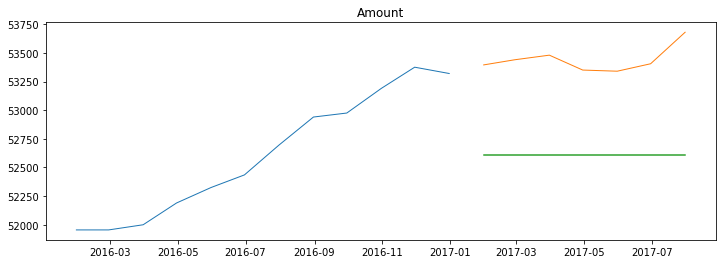

In [200]:
plot_and_eval('Amount')

In [201]:
eval_df

,model_type,target_var,rmse


In [202]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'simple_average', 
                             target_var = col)

In [203]:
eval_df

,model_type,target_var,rmse
0,simple_average,Amount,835.0


<li>Moving Average</li>


In [204]:
# Quarterly averages 

period = 3

revenue = round(train['Amount'].rolling(period).mean().iloc[-1], 2)

yhat_df = make_predictions()
yhat_df

,Amount
Month_Invoiced,
2017-01-31,53295.0
2017-02-28,53295.0
2017-03-31,53295.0
2017-04-30,53295.0
2017-05-31,53295.0
2017-06-30,53295.0
2017-07-31,53295.0


Amount -- RMSE: 182


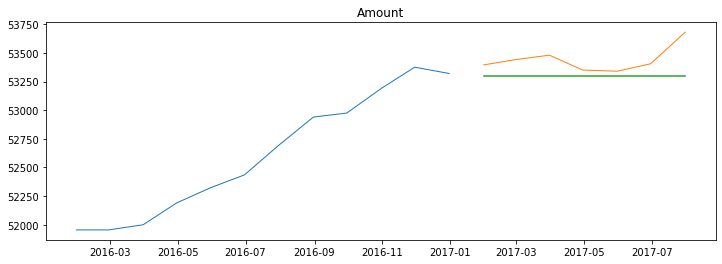

In [205]:
for col in train.columns:
    plot_and_eval(col)

In [206]:
# Evaluate

for col in train.columns:
    eval_df = append_eval_df(model_type='Quarterly moving average', 
                             target_var = col)

In [207]:
eval_df

,model_type,target_var,rmse
0,simple_average,Amount,835.0
1,Quarterly moving average,Amount,182.0


<li>Holt's Linear Trend Model</li>


In [212]:
for col in train.columns:
    model = Holt(train[col], exponential = False)
    model = model.fit(smoothing_level = .1, 
                      smoothing_slope = .1, 
                      optimized = False)
    yhat_items = model.predict(start = validate.index[0], 
                               end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

Amount -- RMSE: 540


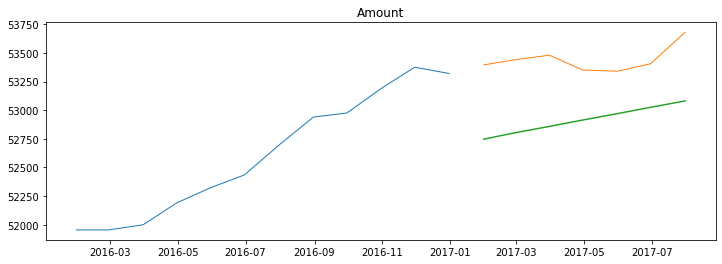

In [213]:
# Plot
for col in train.columns:
    plot_and_eval(target_var = col)

In [214]:
# Evaluate

for col in train.columns:
    eval_df = append_eval_df(model_type = 'Holts', 
                             target_var = col)

In [215]:
eval_df

,model_type,target_var,rmse
0,simple_average,Amount,835.0
1,Quarterly moving average,Amount,182.0
2,Holts,Amount,540.0


<li>Based on previous year/month/etc., this is up to you.</li>


In [216]:
from prophet import Prophet


In [218]:
prophet_df=train

In [226]:
prophet_df['ds']=prophet_df.index

In [222]:
prophet_df.rename(columns={'Amount':'y'}, inplace=True)

In [223]:
prophet_df

,y,DS
Month_Invoiced,,
2016-01-31,51955.0,2016-01-31
2016-02-29,51955.0,2016-02-29
2016-03-31,52000.0,2016-03-31
2016-04-30,52190.0,2016-04-30
2016-05-31,52325.0,2016-05-31
...,...,...
2016-08-31,52940.0,2016-08-31
2016-09-30,52975.0,2016-09-30
2016-10-31,53190.0,2016-10-31


In [227]:
m = Prophet()
m.fit(prophet_df)

NumExpr defaulting to 8 threads.
Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
n_changepoints greater than number of observations. Using 8.


Initial log joint probability = -0.827057
Iteration  1. Log joint probability =    39.1481. Improved by 39.9752.
Iteration  2. Log joint probability =    49.0391. Improved by 9.89103.
Iteration  3. Log joint probability =    56.6165. Improved by 7.57738.
Iteration  4. Log joint probability =     64.633. Improved by 8.01652.
Iteration  5. Log joint probability =    71.2647. Improved by 6.63162.
Iteration  6. Log joint probability =    74.2892. Improved by 3.0245.
Iteration  7. Log joint probability =    74.4675. Improved by 0.178307.
Iteration  8. Log joint probability =    76.4346. Improved by 1.96711.
Iteration  9. Log joint probability =    77.6554. Improved by 1.22078.
Iteration 10. Log joint probability =    77.8113. Improved by 0.155956.
Iteration 11. Log joint probability =    77.8309. Improved by 0.0195832.
Iteration 12. Log joint probability =    77.8588. Improved by 0.0278887.
Iteration 13. Log joint probability =    77.8854. Improved by 0.026641.
Iteration 14. Log joint proba

In [229]:
len(validate)

7

In [228]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
372,2017-12-27
373,2017-12-28
374,2017-12-29
375,2017-12-30
376,2017-12-31


In [249]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
372,2017-12-27,54789.020796,53208.205778,56277.927298
373,2017-12-28,54792.881696,53198.953875,56286.292511
374,2017-12-29,54796.742596,53187.825759,56306.001261
375,2017-12-30,54800.603496,53212.431441,56279.275726
376,2017-12-31,54804.464395,53186.470918,56323.119220


In [267]:
predictions = forecast[['ds','yhat']]

In [268]:
predictions

,ds,yhat
0,2016-01-31,51946.976451
1,2016-02-29,51963.022063
2,2016-03-31,52015.509324
3,2016-04-30,52171.134999
4,2016-05-31,52316.314241
...,...,...
372,2017-12-27,54789.020796
373,2017-12-28,54792.881696
374,2017-12-29,54796.742596
375,2017-12-30,54800.603496


In [269]:
predictions.ds=pd.to_datetime(predictions.ds)
predictions = predictions.set_index('ds')

In [270]:
predictions = predictions.resample('M').mean()

In [274]:
predictions2 = predictions[train_size : validate_end_index]

In [271]:
train.head()

,y,DS,ds
Month_Invoiced,,,
2016-01-31,51955.0,2016-01-31,2016-01-31
2016-02-29,51955.0,2016-02-29,2016-02-29
2016-03-31,52000.0,2016-03-31,2016-03-31
2016-04-30,52190.0,2016-04-30,2016-04-30
2016-05-31,52325.0,2016-05-31,2016-05-31


In [272]:
predictions.tail()

,yhat
ds,
2017-08-31,54275.521125
2017-09-30,54393.278569
2017-10-31,54511.036012
2017-11-30,54628.793455
2017-12-31,54746.550899


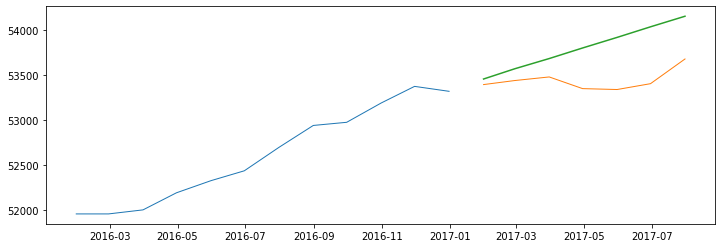

In [275]:
plt.figure(figsize = (12,4))
plt.plot(train['y'], label = 'Train', linewidth = 1)
plt.plot(validate['Amount'], label = 'Validate', linewidth = 1)
plt.plot(predictions2['yhat'])


In [278]:
rmse = round(sqrt(mean_squared_error(validate['Amount'], predictions2['yhat'])),0)

In [279]:
rmse

419.0

In [ ]:
plt.plot(validate[target_var], label = 'Validate', linewidth = 1)

In [280]:
eval_df

,model_type,target_var,rmse
0,simple_average,Amount,835.0
1,Quarterly moving average,Amount,182.0
2,Holts,Amount,540.0


In [289]:
def append_eval_df2(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': 419}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [290]:
append_eval_df2(model_type='prophet', target_var='Amount')

,model_type,target_var,rmse
0,simple_average,Amount,835.0
1,Quarterly moving average,Amount,182.0
2,Holts,Amount,540.0
3,prophet,Amount,419.0


In [293]:
# get the min rmse for each variable

best_model = eval_df.rmse.min()


In [295]:
eval_df[((eval_df.rmse == best_model))]

,model_type,target_var,rmse
1,Quarterly moving average,Amount,182.0


In [ ]:

# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[((eval_df.rmse == min_rmse_dollars_sold) | 
         (eval_df.rmse == min_rmse_items_sold)
        )]

---

Prophet can apparently account for the trend changing over time. If time allows, do a second prophet model using the entire dataset

<p>Optional: Using store item demand</p>


<li>Predict 2018 total <strong>monthly</strong> sales for a single store and/or item by creating a model.</li>


<li>Return a dataframe with the month, store_id, y-hat, and the confidence intervals (y-hat lower, y-hat upper).</li>


<li>Plot the 2018 monthly sales predictions.</li>
</ol>